# 3 y 4 - 

In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def aceleracion_ajuste_cuadratico(tiempo, posicion, incerteza_posicion, M, m):
    # Definir la función cuadrática para el ajuste
    def modelo_cuadratico(t, a, v0, x0):
        return (a/2) * t**2 + v0 * t + x0

    # Realizar el ajuste cuadrático
    parametros, covarianza = curve_fit(modelo_cuadratico, tiempo, posicion)
    a_fit, v0_fit, x0_fit = parametros
    v0_fit = 0 if v0_fit < 0 else v0_fit  # La velocidad inicial no puede ser negativa

    # Calcular incertezas en los parámetros
    incertezas_parametros = np.sqrt(np.diag(covarianza))

    # Graficar los datos y el ajuste
    plt.errorbar(tiempo, posicion, yerr=incerteza_posicion, fmt='o', label="Datos experimentales", capsize=3)
    t_fit = np.linspace(0, max(tiempo), 500)
    posicion_fit = modelo_cuadratico(t_fit, *parametros)
    plt.plot(t_fit, posicion_fit, label="Ajuste cuadrático", color='red')

    # Mostrar resultados en el gráfico
    texto = (f"Aceleración (a): ({a_fit:.3f} ± {incertezas_parametros[0]:.3f}) cm/s²\n"
             f"Velocidad inicial (v0): ({v0_fit:.3f} ± {incertezas_parametros[1]:.3f}) cm/s\n"
             f"Posición inicial (x0): ({x0_fit:.3f} ± {incertezas_parametros[2]:.3f}) cm")

    plt.text(0.025, 0.7, texto, transform=plt.gca().transAxes, fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="black"))

    # Detalles del gráfico
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Posición (cm)")
    plt.title(f"Gráfico de Posición vs Tiempo con Ajuste Cuadrático - M={M}[g], m={m}[g]")
    plt.legend()
    plt.grid(True)
    plt.savefig(f"ajuste_cuadratico_M{M}g_m{m}g.png")
    plt.show()

    # Imprimir los resultados del ajuste
    print(f"Ajuste cuadrático:")
    print(f"Aceleración (a): {a_fit:.3f} ± {incertezas_parametros[0]:.3f} cm/s^2")
    print(f"Velocidad inicial (v0): {v0_fit:.3f} ± {incertezas_parametros[1]:.3f} cm/s")
    print(f"Posición inicial (x0): {x0_fit:.3f} ± {incertezas_parametros[2]:.3f} cm")

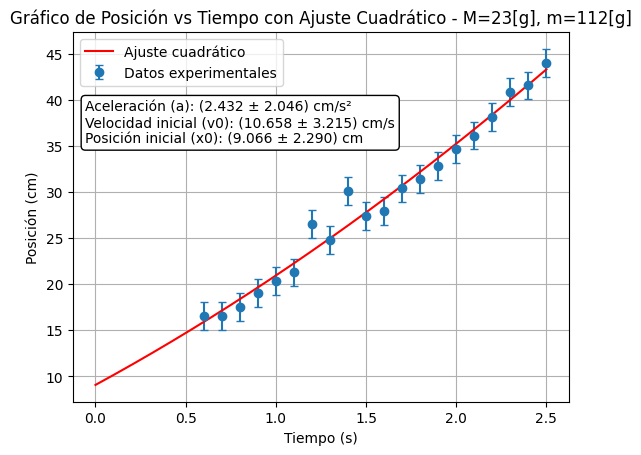

Ajuste cuadrático:
Aceleración (a): 2.432 ± 2.046 cm/s^2
Velocidad inicial (v0): 10.658 ± 3.215 cm/s
Posición inicial (x0): 9.066 ± 2.290 cm


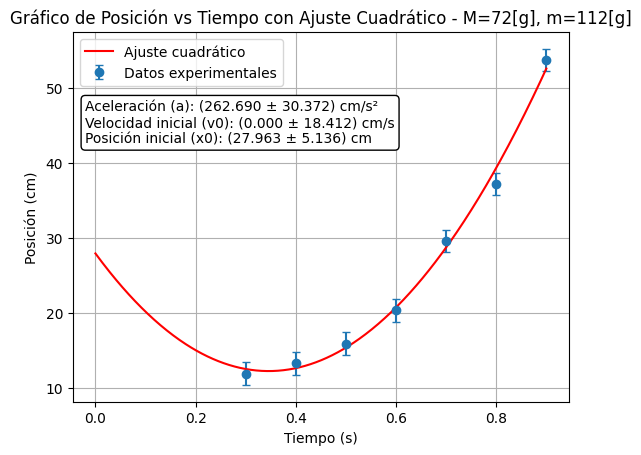

Ajuste cuadrático:
Aceleración (a): 262.690 ± 30.372 cm/s^2
Velocidad inicial (v0): 0.000 ± 18.412 cm/s
Posición inicial (x0): 27.963 ± 5.136 cm


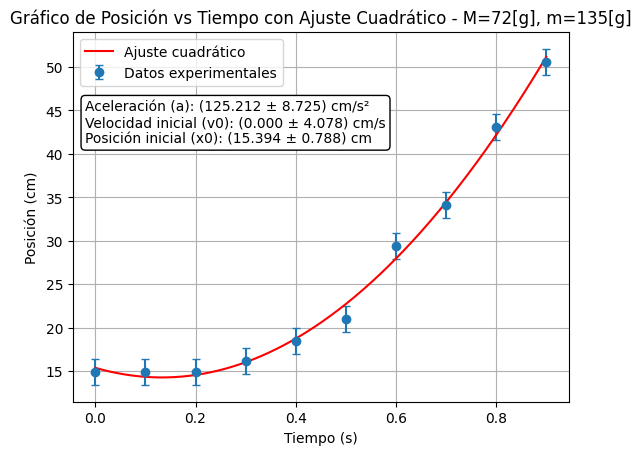

Ajuste cuadrático:
Aceleración (a): 125.212 ± 8.725 cm/s^2
Velocidad inicial (v0): 0.000 ± 4.078 cm/s
Posición inicial (x0): 15.394 ± 0.788 cm


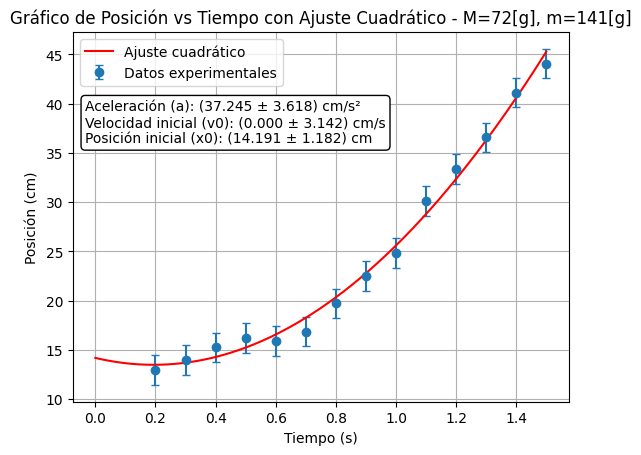

Ajuste cuadrático:
Aceleración (a): 37.245 ± 3.618 cm/s^2
Velocidad inicial (v0): 0.000 ± 3.142 cm/s
Posición inicial (x0): 14.191 ± 1.182 cm


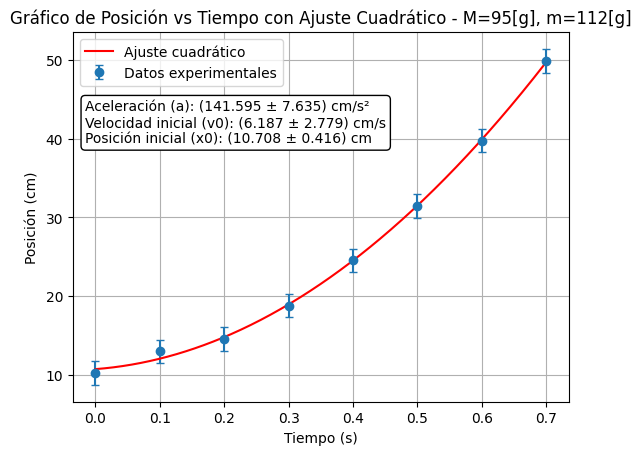

Ajuste cuadrático:
Aceleración (a): 141.595 ± 7.635 cm/s^2
Velocidad inicial (v0): 6.187 ± 2.779 cm/s
Posición inicial (x0): 10.708 ± 0.416 cm


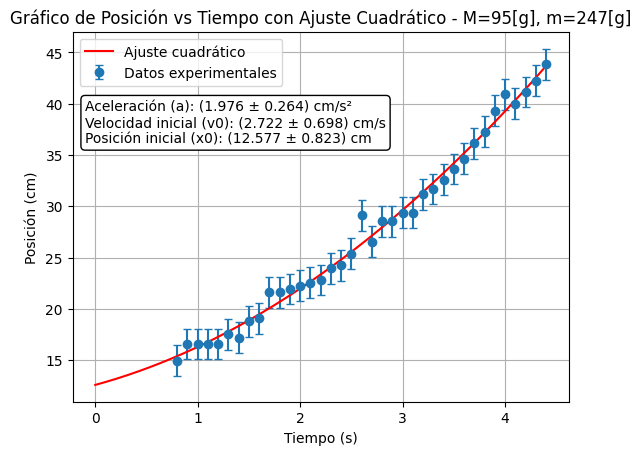

Ajuste cuadrático:
Aceleración (a): 1.976 ± 0.264 cm/s^2
Velocidad inicial (v0): 2.722 ± 0.698 cm/s
Posición inicial (x0): 12.577 ± 0.823 cm


In [2]:
# Prueba 1 (Plateada vs Trineo)
tiempo_1 = np.array([600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 
            1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500]) / 1000  # Convertir a segundos

posiciones_1 = [16.56, 16.56, 17.49, 19.07, 20.35, 21.28, 
                26.52, 24.8, 30.14, 27.4, 27.97, 30.4, 31.42, 32.84, 34.65, 36.13, 38.15, 40.89, 
                41.57, 44.03]

# Prueba 2 (Dorada vs Trineo)
tiempo_2 = np.array([300, 400, 500, 600, 700, 800, 900]) / 1000

posiciones_2 = [11.92, 13.31, 15.93, 20.35, 29.61, 37.26, 53.75]

# Prueba 3 (Dorada vs Plateada dentro del trineo)
tiempo_3 = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900]) / 1000

posiciones_3 = [14.93, 14.93, 14.93, 16.23, 18.46, 20.98, 29.36, 34.14, 43.04, 50.56]

# Prueba 4 (Dorada vs Rozamiento, Plateada y Madera)
tiempo_4 = np.array([200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]) / 1000

posiciones_4 = [12.95, 13.99, 15.27, 16.23, 15.93, 16.86, 19.72, 
                22.53, 24.82, 30.14, 33.37, 36.57, 41.12, 44.05]

# Prueba 5 (Plateada y Dorada vs Rozamiento)
tiempo_5 = np.array([0, 100, 200, 300, 400, 500, 600, 700]) / 1000

posiciones_5 = [10.2, 12.95, 14.57, 18.77, 24.53, 31.42, 39.76, 49.9]

# Prueba 6 (Plateada y Dorada vs Rozamiento y Calculadora)
tiempo_6 = np.array([800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 
            1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 
            3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400]) / 1000

posiciones_6 = [14.93, 16.56, 16.56, 16.56, 16.56, 
                17.51, 17.19, 18.77, 19.09, 21.61, 21.61, 21.93, 22.24, 22.53, 22.81, 23.95, 24.24, 25.38, 
                29.1, 26.54, 28.53, 28.54, 29.38, 29.36, 31.16, 31.67, 32.59, 33.63, 34.65, 36.13, 37.26, 
                39.32, 40.9, 40, 41.14, 42.25, 43.84]

incerteza_distancia = 1.5  # cm

# Masas
# Pelotas
madera = 6
plateada = 23
dorada = 72

trineo = 112
calculadora = 135

# Cálculos de aceleración con ajuste cuadrático
aceleracion_ajuste_cuadratico(tiempo_1, posiciones_1, incerteza_distancia, plateada, trineo)
aceleracion_ajuste_cuadratico(tiempo_2, posiciones_2, incerteza_distancia, dorada, trineo)
aceleracion_ajuste_cuadratico(tiempo_3, posiciones_3, incerteza_distancia, dorada, trineo+plateada)
aceleracion_ajuste_cuadratico(tiempo_4, posiciones_4, incerteza_distancia, dorada, trineo+madera+plateada)
aceleracion_ajuste_cuadratico(tiempo_5, posiciones_5, incerteza_distancia, plateada+dorada, trineo)
aceleracion_ajuste_cuadratico(tiempo_6, posiciones_6, incerteza_distancia, plateada+dorada, trineo+calculadora)

# 5 - 

Aceleración 1: 2.432 ± 2.046 cm/s²
Aceleración 2: 262.690 ± 30.372 cm/s²
Aceleración 3: 125.212 ± 8.725 cm/s²
Aceleración 4: 37.245 ± 3.618 cm/s²
Aceleración 5: 141.595 ± 7.635 cm/s²
Aceleración 6: 1.976 ± 0.264 cm/s²


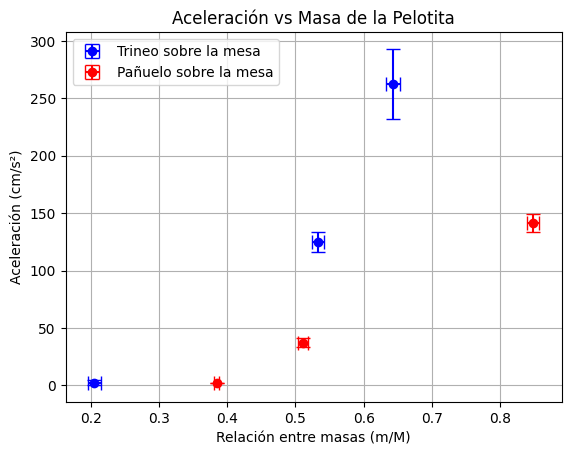

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def aceleracion_masas(tiempo, posicion, m, M):
    # Definir la función cuadrática para el ajuste
    def modelo_cuadratico(t, a, v0, x0):
        return (a/2) * t**2 + v0 * t + x0

    # Realizar el ajuste cuadrático
    parametros, covarianza = curve_fit(modelo_cuadratico, tiempo, posicion)
    a_fit, _, _ = parametros

    # Calcular incertezas en los parámetros
    incertezas_parametros = np.sqrt(np.diag(covarianza))

    return a_fit, incertezas_parametros[0]

def grafico_aceleracion_masas(aceleraciones_sr, incertezas_aceleraciones_sr, pesos_m_sr, pesos_M_sr, incertezas_realcion_s_panuelo, aceleraciones_cr, incertezas_aceleraciones_cr, pesos_m_cr, pesos_M_cr, incertezas_relacion_c_panuelo):
    realciones_m_M_sr = [m/M for m, M in zip(pesos_m_sr, pesos_M_sr)]
    realciones_m_M_cr = [m/M for m, M in zip(pesos_m_cr, pesos_M_cr)]

    # Crear gráfico de aceleración vs masa
    plt.errorbar(realciones_m_M_sr, aceleraciones_sr, xerr=incertezas_relacion_sin_panuelo, yerr=incertezas_aceleraciones_sr, fmt='o', color='blue', capsize=5)
    plt.errorbar(realciones_m_M_cr, aceleraciones_cr, xerr=incertezas_relacion_con_panuelo, yerr=incertezas_aceleraciones_cr, fmt='o', color='red', capsize=5)
    plt.xlabel('Relación entre masas (m/M)')
    plt.ylabel('Aceleración (cm/s²)')
    plt.title('Aceleración vs Masa de la Pelotita')
    plt.grid(True)
    plt.legend(['Trineo sobre la mesa', 'Pañuelo sobre la mesa'])
    plt.savefig('aceleracion_vs_relacion_masas.png')
    plt.show()


def propagacion_error(derivadas_s_panuelo, derivadas_c_panuelo, error=1):
    """
    f: Función objetivo, no se utiliza directamente en esta implementación
    derivadas: Lista de derivadas parciales [df/dx1, df/dx2, df/dx3]
    errores: Lista de errores [σ_x1, σ_x2, σ_x3]
    
    Retorna: Propagación del error
    """
    # Inicializamos la propagación del error en 0
    errores_s_panuelo = []
    errores_c_panuelo = []


    for derivada in derivadas_s_panuelo:
        errores_s_panuelo.append(np.sqrt((derivada[0]**2) * (error**2) + (derivada[1]**2) * (error**2)))

    for derivada in derivadas_c_panuelo:    
        errores_c_panuelo.append(np.sqrt((derivada[0]**2) * (error**2)) + (derivada[1]**2) * (error**2))

    # Calculamos el cuadrado de la propagación del error
    # for derivada, error in zip(derivadas, errores):
    #     sigma_f_squared += (derivada**2) * (error**2)
    
    # Retornamos la raíz cuadrada para obtener el error final
    return errores_s_panuelo, errores_c_panuelo

# Prueba 1 (Plateada vs Trineo)
tiempo_1 = np.asarray([600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 
            1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500]) / 1000  # Convertir a segundos

posiciones_1 = np.asarray([16.56, 16.56, 17.49, 19.07, 20.35, 21.28, 
                26.52, 24.8, 30.14, 27.4, 27.97, 30.4, 31.42, 32.84, 34.65, 36.13, 38.15, 40.89, 
                41.57, 44.03])

# Prueba 2 (Dorada vs Trineo)
tiempo_2 = np.asarray([300, 400, 500, 600, 700, 800, 900]) / 1000

posiciones_2 = np.asarray([11.92, 13.31, 15.93, 20.35, 29.61, 37.26, 53.75])

# Prueba 3 (Dorada vs Plateada dentro del trineo)
tiempo_3 = np.asarray([0, 100, 200, 300, 400, 500, 600, 700, 800, 900]) / 1000

posiciones_3 = np.asarray([14.93, 14.93, 14.93, 16.23, 18.46, 20.98, 29.36, 34.14, 43.04, 50.56])

# Prueba 4 (Dorada vs Rozamiento, Plateada y Madera)
tiempo_4 = np.asarray([200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500]) / 1000

posiciones_4 = np.asarray([12.95, 13.99, 15.27, 16.23, 15.93, 16.86, 19.72, 
                22.53, 24.82, 30.14, 33.37, 36.57, 41.12, 44.05])

# Prueba 5 (Plateada y Dorada vs Rozamiento)
tiempo_5 = np.asarray([0, 100, 200, 300, 400, 500, 600, 700]) / 1000

posiciones_5 = np.asarray([10.2, 12.95, 14.57, 18.77, 24.53, 31.42, 39.76, 49.9])

# Prueba 6 (Plateada y Dorada vs Rozamiento y Calculadora)
tiempo_6 = np.asarray([800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 
            1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 
            3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400]) / 1000

posiciones_6 = np.asarray([14.93, 16.56, 16.56, 16.56, 16.56, 
                17.51, 17.19, 18.77, 19.09, 21.61, 21.61, 21.93, 22.24, 22.53, 22.81, 23.95, 24.24, 25.38, 
                29.1, 26.54, 28.53, 28.54, 29.38, 29.36, 31.16, 31.67, 32.59, 33.63, 34.65, 36.13, 37.26, 
                39.32, 40.9, 40, 41.14, 42.25, 43.84])

incerteza_distancia = 1.5  # cm

# Masas
# Pelotas
madera = 6
plateada = 23
dorada = 72

trineo = 112
calculadora = 135

# Datos de aceleración e incertezas
aceleracion_prueba1, incerteza1 = aceleracion_masas(tiempo_1, posiciones_1, plateada, trineo)
aceleracion_prueba2, incerteza2 = aceleracion_masas(tiempo_2, posiciones_2, dorada, trineo)
aceleracion_prueba3, incerteza3 = aceleracion_masas(tiempo_3, posiciones_3, dorada, trineo+plateada)
aceleracion_prueba4, incerteza4 = aceleracion_masas(tiempo_4, posiciones_4, dorada, trineo+madera+plateada)
aceleracion_prueba5, incerteza5 = aceleracion_masas(tiempo_5, posiciones_5, plateada+dorada, trineo)
aceleracion_prueba6, incerteza6 = aceleracion_masas(tiempo_6, posiciones_6, plateada+dorada, trineo+calculadora)

print(f"Aceleración 1: {aceleracion_prueba1:.3f} ± {incerteza1:.3f} cm/s²")
print(f"Aceleración 2: {aceleracion_prueba2:.3f} ± {incerteza2:.3f} cm/s²")
print(f"Aceleración 3: {aceleracion_prueba3:.3f} ± {incerteza3:.3f} cm/s²")
print(f"Aceleración 4: {aceleracion_prueba4:.3f} ± {incerteza4:.3f} cm/s²")
print(f"Aceleración 5: {aceleracion_prueba5:.3f} ± {incerteza5:.3f} cm/s²")
print(f"Aceleración 6: {aceleracion_prueba6:.3f} ± {incerteza6:.3f} cm/s²")

# Regresión ratio de masas vs. aceleración, propagación de errores
incertezas_aceleracion = [incerteza1, incerteza2, incerteza3, incerteza4, incerteza5, incerteza6]

incertezas_relacion_sin_panuelo, incertezas_relacion_con_panuelo = propagacion_error([[1/trineo, -plateada/(trineo**2)], [1/trineo, -dorada/(trineo**2)], [1/(trineo+plateada), -dorada/((trineo+plateada)**2)]], 
                                                                                     [[1/(trineo+madera+plateada), -dorada/((trineo+madera+plateada)**2)], [1/trineo, -(plateada+dorada)/(trineo**2)], [1/(trineo+calculadora), -(plateada+dorada)/((trineo+calculadora)**2)]])

# Graficar aceleración vs masa
grafico_aceleracion_masas([aceleracion_prueba1, aceleracion_prueba2, aceleracion_prueba3], [incerteza1, incerteza2, incerteza3], [plateada, dorada, dorada], [trineo, trineo, trineo+plateada], incertezas_relacion_sin_panuelo,
                          [aceleracion_prueba4, aceleracion_prueba5, aceleracion_prueba6], [incerteza4, incerteza5, incerteza6], [dorada, plateada+dorada, plateada+dorada], [trineo+madera+plateada, trineo, trineo+calculadora], incertezas_relacion_con_panuelo)